# 4. Discussion and Conclusion

some text

## 4.1 Model Comparisons

### We can use one sample composition to show comparisons between model calcs, user can change this sample to whatever they want! This becomes a useful tool for anyone to automatically compare model results for all calcs for any sample of interest.

In [1]:
import sys
sys.path.insert(0, '../')

import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

myfile = v.ExcelFile('../testDataSets/example_data.xlsx', input_type='wtpercent')

my_sample = {'SiO2':  77.3,
             'TiO2':   0.08, 
             'Al2O3': 12.6,
             'Fe2O3':  0.207,
             'Cr2O3':  0.0,
             'FeO':    0.473,
             'MnO':    0.0,
             'MgO':    0.03,
             'NiO':    0.0,
             'CoO':    0.0,
             'CaO':    0.43,
             'Na2O':   3.98,
             'K2O':    4.88,
             'P2O5':   0.0,
             'H2O':    6.5,
             'CO2':    0.05}

<hr>

In [2]:
# MS_isobars, MS_isopleths = v.calculate_isobars_and_isopleths(sample=my_sample, 
#                                             temperature=900.0,
#                                             pressure_list=[2000.0],
#                                             isopleth_list=[0.5],
#                                             print_status=True).result

Shish_isobars, Shish_isopleths = v.calculate_isobars_and_isopleths(model='Shishkina',
                                                                   sample=my_sample, 
                                                                    temperature=1200.0,
                                                                    pressure_list=[2000.0, 3000.0],
                                                                    isopleth_list=[]).result

Dix_isobars, Dix_isopleths = v.calculate_isobars_and_isopleths(model='Dixon',
                                                                   sample=my_sample, 
                                                                    temperature=1200.0,
                                                                    pressure_list=[2000.0, 3000],
                                                                    isopleth_list=[]).result

Iac_isobars, Iac_isopleths = v.calculate_isobars_and_isopleths(model='IaconoMarziano',
                                                                   sample=my_sample, 
                                                                    temperature=1200.0,
                                                                    pressure_list=[2000.0, 3000],
                                                                    isopleth_list=[]).result

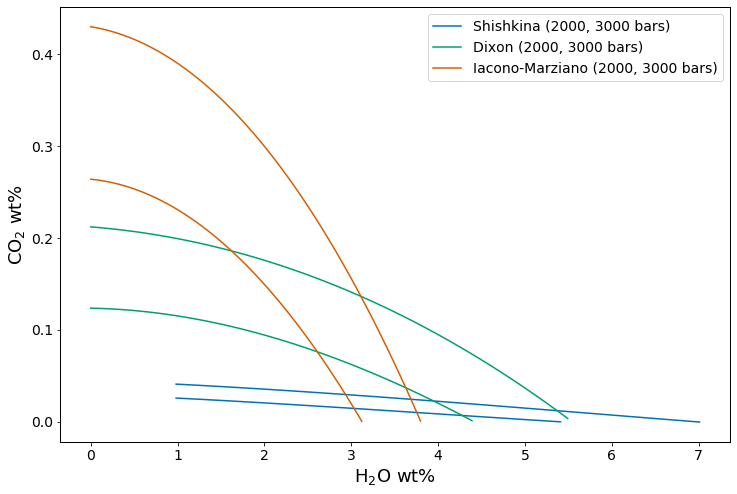

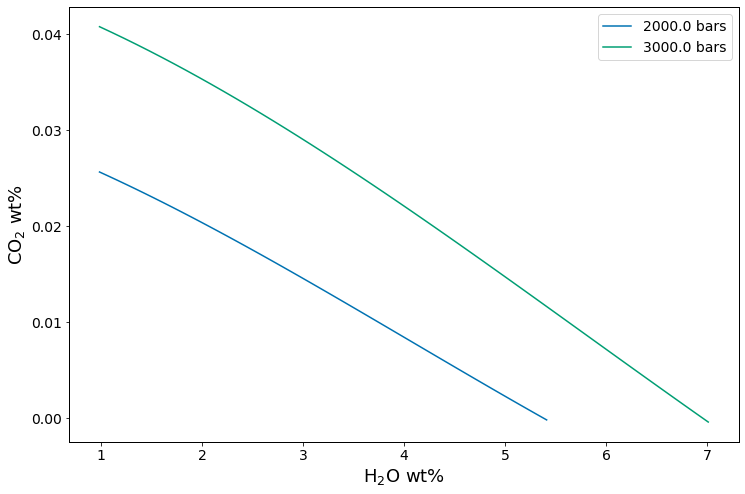

In [3]:
v.plot_isobars_and_isopleths([Shish_isobars, Dix_isobars, Iac_isobars], labels=["Shishkina", "Dixon", "Iacono-Marziano"])
v.plot_isobars_and_isopleths(isobars=Shish_isobars)

In [4]:
magmasat_vols = myfile.calculate_dissolved_volatiles(temperature=900.0, 
                                pressure=2000.0, X_fluid=0.5, verbose=False)

# shish_vols = myfile.calculate_dissolved_volatiles(model='Shishkina', temperature=900.0,
#                                 pressure=2000.0, X_fluid=0.5)

# dix_vols = myfile.calculate_dissolved_volatiles(model='Dixon', temperature=900.0,
#                                           pressure=2000.0, X_fluid=0.5)

# iac_vols = myfile.calculate_dissolved_volatiles(model='IaconoMarziano', temperature=900.0,
#                                           pressure=2000.0, X_fluid=0.5)

Calculating sample Kil3-6_1a
Calculating sample Kil3-6_3a
Calculating sample Kil3-6_4a
Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample SAT-M12-1
Calculating sample SAT-M12-2
Calculating sample SAT-M12-4
Calculating sample samp. P1968
Calculating sample samp. P1968
Calculating sample samp. P1968
Calculating sample samp. HPR3-1_XL-3
Calculating sample samp. HPR3-1_XL-4_INCL-1
Calculating sample AW-6
Calculating sample AW-46
Calculating sample KI-07


Shishkina
Dixon
IaconoMarziano
Liu


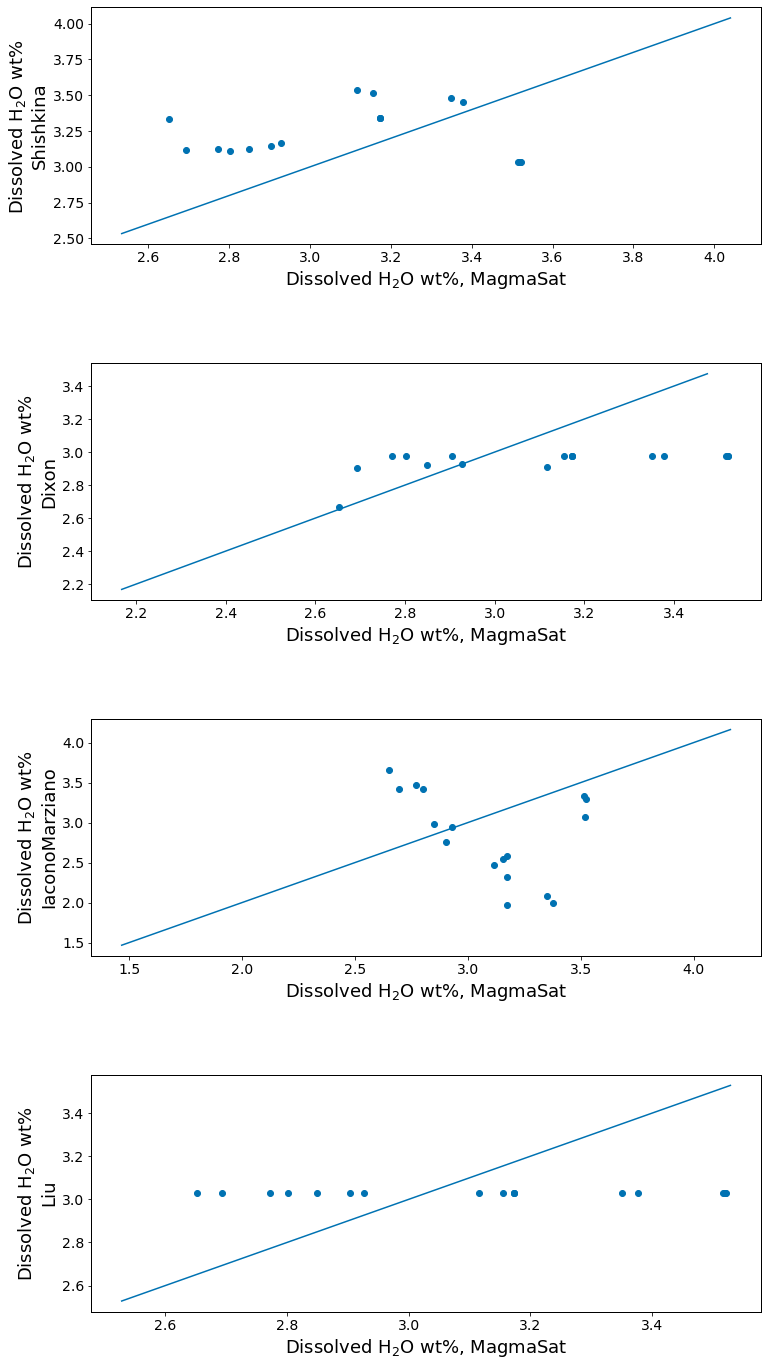

In [5]:
models = v.get_models(models='mixed')
fig, ax = plt.subplots(len(models), figsize=(12,24))
fig.subplots_adjust(hspace=.5)

for i in range(len(models)):
    print(models[i])
    ax[i].set_ylabel('Dissolved H$_2$O wt% \n' + str(models[i]))
    ax[i].set_xlabel('Dissolved H$_2$O wt%, MagmaSat')
    result = myfile.calculate_dissolved_volatiles(model=models[i], temperature=1200.0,
                                pressure=2000.0, X_fluid=0.5)
    ax[i].scatter(magmasat_vols["H2O_liq_VESIcal"],
                  result["H2O_liq_VESIcal"])
    xy_1to1 = np.linspace(result["H2O_liq_VESIcal"].min()-0.5,result["H2O_liq_VESIcal"].max()+0.5,100)
    ax[i].plot(xy_1to1, xy_1to1)